# 人脸识别引擎测试

引擎接口文档：http://192.168.1.242:20900/docs

需要先安装工具库，具体见：https://github.com/ibbd-dev/python-image-utils

## 01 人脸检测

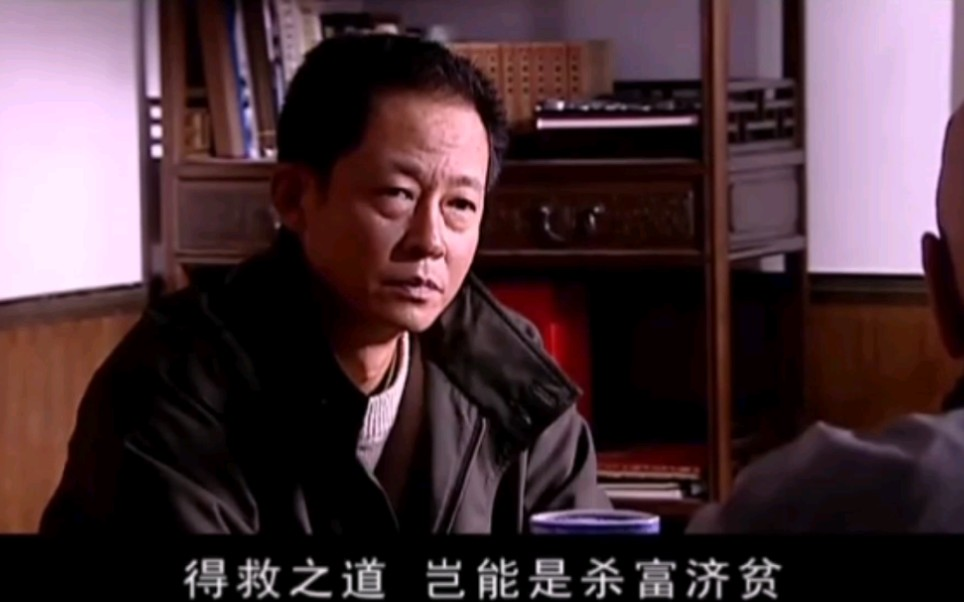

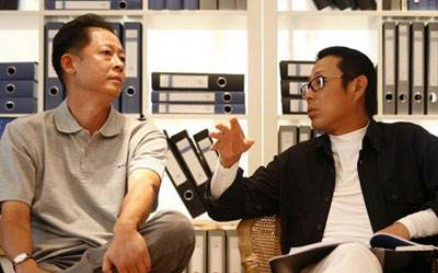

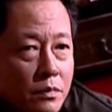

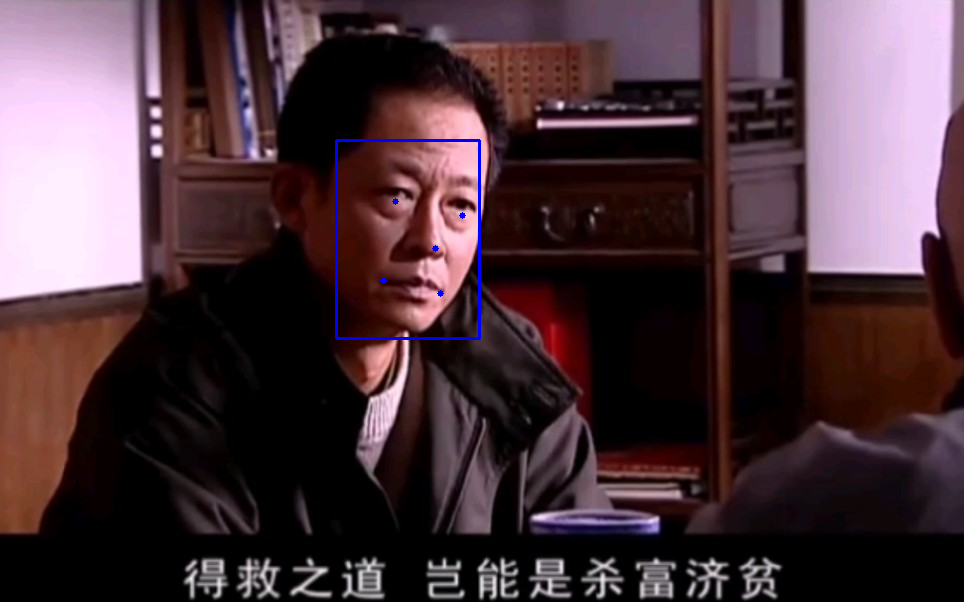

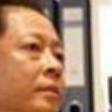

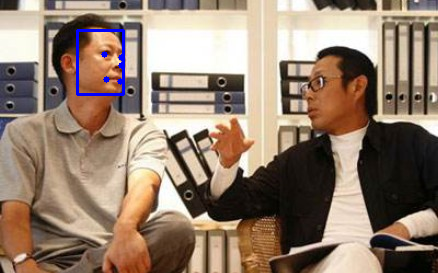

In [15]:
import requests
import cv2
from image_utils.convert import cv2_base64, cv2_pil, base64_pil
from IPython.display import display

url = 'http://192.168.1.242:20900/images/detect'
img_file = 'test01.jpg'    # 测试图像
img1 = cv2.imread(img_file)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
display(cv2_pil(img1))

img_file = 'test02.jpg'    # 测试图像
img2 = cv2.imread(img_file)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
display(cv2_pil(img2))

images = [img1, img2]
body = {
    'images': [cv2_base64(img) for img in images],
    'align': True,
    # 'threshold': 0.6,
}
data = requests.post(url, json=body).json()

for img, img_data in zip(images, data):
    for face in img_data['faces']:
        display(base64_pil(face['face']))
        x, y, xb, yb = [int(i) for i in face['box']]
        cv2.rectangle(img, (x, y), (xb, yb), (0,0,255), 2) 
        for p in face['landmarks']:
            cx, cy = p
            cv2.circle(img, (int(cx), int(cy)), 3, (0,0,255), -1)
        
    display(cv2_pil(img))

## 02 人脸识别

In [17]:
# 人脸识别
import numpy as np

url = 'http://192.168.1.242:20900/images/recognize'
body = {
    'faces': [face['face'] for face in data[0]['faces']]+[face['face'] for face in data[1]['faces']]
}
data2 = requests.post(url, json=body).json()

diff = np.subtract(data2[0]['embedding'], data2[1]['embedding'])
dist = np.linalg.norm(diff)
print(dist)

1.2289357778862924
